# Project Intro
`24点游戏`
两位玩家参与，两位玩家平分一副牌。每一轮两人同时分别出2张牌，对4张牌的点数进行**加减乘除**运算，结果等于24时为一种有效答案。最快给出答案玩家获胜，获胜玩家获得4张牌，然后继续进行下一轮，直至其中一位玩家手牌数为0。
- JQK，分别代表11、12、13点；
- JOKER牌不参与游戏；
- 运算要限于**加减乘除**；

## Questions
- 考虑花色不同，有多少种出牌可能？点数可能？
- 其中能计算出24点的牌型数有多少种？点数组合有多少种？
- 不考虑花色，有效答案最多的点数组合是？

## 产出
- 提供4张牌，根据点数，提供对应的计算过程。

## 策略
- 根据分析结果提出增加胜率的策略；

## 拓展
- 将4张牌的24点计算过程，做成一个输出的产品【用户4张牌，呈现计算过程】

# Pkgs

In [1]:
from operator import *
import itertools

import pandas as pd
import numpy as np

# 数据准备

In [4]:
# 4种花色的牌型，每种牌13张
spade = range(1, 14)
heart = range(1, 14)
diamond = range(1, 14)
club = range(1, 14)

combinations = list(itertools.product(spade, heart, diamond, club))  # 所有排列组合

comb_df = pd.DataFrame(combinations, columns=['spade', 'heart', 'diamond', 'club'])
comb_df.head()

,spade,heart,diamond,club
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


# 一种实现方法
## 两个数的结果空间

In [2]:
# 定义一个按符号进行四则运算的函数
def calculator(num_a, num_b, oper):
    '''按计算符号整合为一个函数。
    Args:
        num_a(int/float) - a num.
        num_b(int/float) - a num.
        oper(str)        - a operator.
    Returns:
        result(int/float) - result of a and b after operatin.
    '''
    cal_dict = {
        '+': add,
        '-': sub,
        '*': mul,
        '/': truediv  
        }
    return cal_dict[oper](num_a, num_b)

In [3]:
calculator(1, 3, '/')

0.3333333333333333

In [23]:
# 两个数的所有结果空间
def two_num_results(num_a, num_b):
    result = []
    
    result_add = calculator(num_a, num_b, '+')
    result_sub1 = calculator(num_a, num_b, '-')    # 减法有两种情况
    result_sub2 = calculator(num_b, num_a, '-')
    result_mul = calculator(num_a, num_b, '*')
    result = result + [result_add, result_sub1, result_sub2, result_mul]
    
    # 除法要特殊处理
    if num_a != 0:
        result_div1 = calculator(num_b, num_a, '/')
        result.append(result_div1)
    if num_b != 0:
        result_div2 = calculator(num_a, num_b, '/')
        result.append(result_div2)
        
    result = list(set(result))
    return result

In [25]:
print(two_num_results(2, 3))

print(two_num_results(3, 2))   # 验证，交换后结果一致

[0.6666666666666666, 1, 1.5, 5, 6, -1]
[0.6666666666666666, 1, 1.5, 5, 6, -1]


## 两个list的元素组合后的结果空间

In [27]:
# 拓展为两个列表的组合空间
def two_list_results(list_a, list_b):
    result = []
    for num_a in list_a:
        for num_b in list_b:
            result = result + two_num_results(num_a, num_b)
    result = list(set(result))
    return result 

In [33]:
list_a = [1, 2, 3]
list_b = [4, 5, 6]
result_a = two_list_results(list_a, list_b)
result_b = two_list_results(list_a, list_b)
result_a.sort()
result_b.sort()

print(result_a)
print(result_b)

[-5, -4, -3, -2, -1, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.4, 0.5, 0.6, 0.75, 1, 1.3333333333333333, 1.6666666666666667, 2, 2.5, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 18]
[-5, -4, -3, -2, -1, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 0.4, 0.5, 0.6, 0.75, 1, 1.3333333333333333, 1.6666666666666667, 2, 2.5, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 18]


## 三个数的结果空间

In [34]:
# 拓展为三个数的结果空间
def three_num_results(num_a, num_b, num_c):
    result = []
    num_list = [num_a, num_b, num_c]
    
    # 1+2模式
    for i in range(len(num_list)):
        temp_list = num_list.copy()
        removed_num = temp_list[i]
        del temp_list[i]
        
        # 剩余2个数的结果空间
        temp_result = two_num_results(temp_list[0], temp_list[1])
        # 补充加上删除元素的结果空间
        for num in temp_result:
            result = result + two_num_results(num, removed_num)

    result = list(set(result))
    return result

## 4个数的结果空间

In [42]:
def four_num_results(num_a, num_b, num_c, num_d):
    result = []
    num_list = [num_a, num_b, num_c, num_d]
    
    # 1+3方式
    for i in range(len(num_list)):
        temp_list = num_list.copy()
        removed_num = num_list[i]
        del temp_list[i]
        
        # 剩余3个数结果空间
        temp_result = three_num_results(temp_list[0], temp_list[1], temp_list[2])
        # 补充加上删除元素的结果空间
        for e in temp_result:
            result = result + two_num_results(e, removed_num)
    
    # 2+2 模式
    num_1 = num_list[0]                             # 固定一个
    for i in range(1, 4):
        num_2 = num_list[i]
        result_h1 = two_num_results(num_1, num_2)   # 选出的两个数进行计算
        
        temp_list = num_list.copy()
        del temp_list[i]
        del temp_list[0]
        num_3 = temp_list[0]
        num_4 = temp_list[1]
        result_h2 = two_num_results(num_3, num_4)   # 剩余两个
        # 合并结果
        result = result + two_list_results(result_h1, result_h2)
    # 两种模式的结果
    result = list(set(result))
    return result

In [106]:
a =four_num_results(8, 8, 3, 3)
a.sort()
a

[-189,
 -183,
 -168,
 -120,
 -85,
 -64,
 -63.0,
 -58,
 -56.0,
 -55,
 -48,
 -45,
 -43,
 -40,
 -39,
 -37,
 -29,
 -25,
 -23.99999999999999,
 -23.625,
 -23,
 -22.875,
 -21.333333333333332,
 -21.0,
 -20.333333333333332,
 -19,
 -18.333333333333332,
 -16,
 -15.0,
 -13.333333333333334,
 -13.333333333333332,
 -13,
 -10.625,
 -10,
 -9.666666666666666,
 -9,
 -8.6,
 -8.333333333333334,
 -8,
 -7.875,
 -7.7272727272727275,
 -7.666666666666666,
 -7.4,
 -7.25,
 -7.111111111111111,
 -7,
 -6.875,
 -6.666666666666667,
 -6.333333333333333,
 -6,
 -5.375,
 -5.333333333333333,
 -5.0,
 -4.800000000000001,
 -4.8,
 -4.625,
 -4.6,
 -4.333333333333334,
 -4.333333333333333,
 -4.0,
 -3.625,
 -3.0476190476190474,
 -3,
 -2.953125,
 -2.8125,
 -2.666666666666668,
 -2.6666666666666665,
 -2.625,
 -2.5416666666666665,
 -2.375,
 -2.333333333333334,
 -2.3333333333333335,
 -2.333333333333333,
 -2.2916666666666665,
 -2.2727272727272725,
 -2.2,
 -1.875,
 -1.777777777777778,
 -1.625,
 -1.5,
 -1.4,
 -1.1428571428571428,
 -1.0,
 

### 函数测试

In [45]:
# 小范围测试
df = comb_df[comb_df.index<=4]
df

,spade,heart,diamond,club
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


In [46]:
df.apply(lambda x: four_num_results(x['spade'], x['heart'], x['diamond'], x['club']), axis=1)

0    [0, 1, 2, 0.5, 3, -0.5, 1.5, 0.333333333333333...
1    [0.5, 1.5, -0.5, 2.5, 0.6666666666666666, 1.0,...
2    [0.33333333333333326, 1.6666666666666667, -0.6...
3    [0.25, 1.75, -0.75, -0.25, 2.25, 0.8, 1.25, 1....
4    [0.19999999999999996, 1.8, -0.8, -0.1999999999...
dtype: object

# 结果数据构建

In [47]:
# 构建结果空间
comb_df['result_space'] = comb_df.apply(lambda x: four_num_results(x['spade'], x['heart'], x['diamond'], x['club']), axis=1)
comb_df.head()

,spade,heart,diamond,club,result_space
0,1,1,1,1,"[0, 1, 2, 0.5, 3, -0.5, 1.5, 0.333333333333333..."
1,1,1,1,2,"[0.5, 1.5, -0.5, 2.5, 0.6666666666666666, 1.0,..."
2,1,1,1,3,"[0.33333333333333326, 1.6666666666666667, -0.6..."
3,1,1,1,4,"[0.25, 1.75, -0.75, -0.25, 2.25, 0.8, 1.25, 1...."
4,1,1,1,5,"[0.19999999999999996, 1.8, -0.8, -0.1999999999..."


### 结果分析

In [117]:
# 结果空间中中是否有24?
def error(num_list, target=24, error = 1/1000000):
    '''检查结果中是否有24，由于浮点数的-尾巴问题，设定一个error来检查。
    '''
    result = [1 if abs(num - target)<error else 0 for num in num_list]
    result = sum(result)
    return result

In [49]:
# 结果空间
comb_df['result'] = comb_df['result_space'].apply(lambda x: error(x, 24, 1/1000000))
comb_df['result'] = np.where(comb_df['result']>0, 1, 0)
comb_df.head()

,spade,heart,diamond,club,result_space,result
0,1,1,1,1,"[0, 1, 2, 0.5, 3, -0.5, 1.5, 0.333333333333333...",0
1,1,1,1,2,"[0.5, 1.5, -0.5, 2.5, 0.6666666666666666, 1.0,...",0
2,1,1,1,3,"[0.33333333333333326, 1.6666666666666667, -0.6...",0
3,1,1,1,4,"[0.25, 1.75, -0.75, -0.25, 2.25, 0.8, 1.25, 1....",0
4,1,1,1,5,"[0.19999999999999996, 1.8, -0.8, -0.1999999999...",0


In [111]:
comb_df[(comb_df['spade']==3)&(comb_df['heart']==3)&(comb_df['diamond']==8)&(comb_df['club']==8)]

,spade,heart,diamond,club,result_space,result,combination
4830,3,3,8,8,"[0.5625, 0.0625, 2.8125, 3.1875, 0, 3, 0.14062...",1,"[3, 3, 8, 8]"


In [51]:
# 将列表元素排序，不考虑花色后的去重。
def sort_num_list(num_a, num_b, num_c, num_d):
    a = [num_a, num_b, num_c, num_d]
    a.sort()    # 就地排序
    return a

In [52]:
# 将组合排序，方便后续去重
comb_df['combination'] = comb_df.apply(lambda x: sort_num_list(x['spade'], x['heart'], x['diamond'], x['club']), axis=1)
comb_df.head()

,spade,heart,diamond,club,result_space,result,combination
0,1,1,1,1,"[0, 1, 2, 0.5, 3, -0.5, 1.5, 0.333333333333333...",0,"[1, 1, 1, 1]"
1,1,1,1,2,"[0.5, 1.5, -0.5, 2.5, 0.6666666666666666, 1.0,...",0,"[1, 1, 1, 2]"
2,1,1,1,3,"[0.33333333333333326, 1.6666666666666667, -0.6...",0,"[1, 1, 1, 3]"
3,1,1,1,4,"[0.25, 1.75, -0.75, -0.25, 2.25, 0.8, 1.25, 1....",0,"[1, 1, 1, 4]"
4,1,1,1,5,"[0.19999999999999996, 1.8, -0.8, -0.1999999999...",0,"[1, 1, 1, 5]"


## Q：有多少种出牌可能？有多少种出牌点数组合？

In [64]:
# 出牌组合数目
cards_num = comb_df.shape[0]
points_num = comb_df['combination'].value_counts().shape[0]  # 点数组合数量

# 能计算24点牌型
target_df = comb_df[comb_df['result']>=1]

cards_hits = target_df['result'].sum()                                 # 牌型组合数量
points_hits = target_df['combination'].value_counts().shape[0]  # 点数组合数量

print(f'一共有{cards_num}种出牌可能！{points_num}种点数组合！')
print(f'考虑不同花色组合，24点的牌型组合数：{cards_hits}; 构成比例：{cards_hits/cards_num*100:.4}%')
print(f'不考虑不同花色组合，24点的点数组合数：{points_hits}')

一共有28561种出牌可能！1820种点数组合！
考虑不同花色组合，24点的牌型组合数：22615; 构成比例：79.18%
不考虑不同花色组合，24点的点数组合数：1362


## Q: 最可能的点数组合?

In [65]:
most_result = pd.DataFrame(target_df['combination'].value_counts())
most_result.reset_index(inplace=True)

most_result = most_result[most_result['count']==most_result['count'].max()]
most_result

,combination,count
0,"[2, 3, 4, 6]",24
1,"[4, 7, 8, 9]",24
2,"[2, 4, 9, 12]",24
3,"[2, 4, 9, 13]",24
4,"[4, 7, 8, 11]",24
...,...,...
602,"[1, 6, 8, 11]",24
603,"[1, 6, 8, 9]",24
604,"[6, 8, 11, 13]",24
605,"[1, 6, 8, 12]",24


In [67]:
most_result['count'].max()

24

In [72]:
print(f"""{most_result.shape[0]}种点数组合,均有{most_result['count'].max()}种计算过程，均可以计算得到24！""")

607种点数组合,均有24种计算过程，均可以计算得到24！


# 输入牌型提供计算过程
> 输入4张牌的点数，给出一种计算过程

In [126]:
def calculate_mode(num_a, num_b, num_c, num_d, oper):
    '''固定oper顺序，组合数据的出现顺序。
    '''
    num_list = [num_a, num_b, num_c, num_d]
    num_permutations_combinations = list(itertools.permutations(num_list))
    
    result_txt = []
    # 模式1:2+1+1    Q:模式有残缺
    for nums in num_permutations_combinations:
        result_1 = calculator(nums[0], nums[1], oper[0])
        result_2 = calculator(result_1, nums[2], oper[1])
        result = calculator(result_2, nums[3], oper[2])
        if abs(result-24)<1e-10:
            result_txt.append(
                f"计算过程：(({nums[0]} {oper[0]} {nums[1]}) {oper[1]} {nums[2]}){oper[2]} {nums[3]}=24"
                )
    # 模式2:2+2
    for nums in num_permutations_combinations:
        result_1 = calculator(nums[0], nums[1], oper[0])
        result_2 = calculator(nums[2], nums[3], oper[2])
        result = calculator(result_1, result_2, oper[1])
        if abs(result-24)<1e-10:
            result_txt.append(
                f"计算过程：({nums[0]} {oper[0]} {nums[1]}) {oper[1]} ({nums[2]}{oper[2]} {nums[3]})=24"
                )
    return result_txt

In [128]:
nums = [8,3,3,8]
result_1 = calculator(nums[0], nums[1], '/')
reuslt_2 = calculator(result_1, nums[2], oper[1])

(3, 3, 8, 8)
(3, 3, 8, 8)
(3, 8, 3, 8)
(3, 8, 8, 3)
(3, 8, 3, 8)
(3, 8, 8, 3)
(3, 3, 8, 8)
(3, 3, 8, 8)
(3, 8, 3, 8)
(3, 8, 8, 3)
(3, 8, 3, 8)
(3, 8, 8, 3)
(8, 3, 3, 8)
(8, 3, 8, 3)
(8, 3, 3, 8)
(8, 3, 8, 3)
(8, 8, 3, 3)
(8, 8, 3, 3)
(8, 3, 3, 8)
(8, 3, 8, 3)
(8, 3, 3, 8)
(8, 3, 8, 3)
(8, 8, 3, 3)
(8, 8, 3, 3)


In [121]:
def calculate_oper(num_a, num_b, num_c, num_d):
    oper_list = ['+', '-', '*', '/']
    oper_combinations = list(itertools.product(oper_list, oper_list, oper_list))
    
    solution_cnt =0
    result_txt = []
    
    for oper in oper_combinations:
        try:
            result_txt = result_txt + calculate_mode(num_a, num_b, num_c, num_d, oper)
        except:
            result_txt
        
    return result_txt

In [122]:
def display_calculate_process(num_list):
    if len(num_list) !=4:
        print('没有4张牌，不满足条件')
    else:
        results = four_num_results(num_list[0], num_list[1], num_list[2], num_list[3])
        test = error(results, target=24, error = 1e-10)
        if test:
            result_txt = calculate_oper(num_list[0], num_list[1], num_list[2], num_list[3])
            result_txt = list(set(result_txt))
            print('-'*40)
            print('计算过程如下：')
            print('-'*40)
            for i in range(len(result_txt)):
                print(f'第{i+1}种-', result_txt[i])
        else:
            print('结果空间，不包含24！')

In [123]:
display_calculate_process([3, 3, 8, 8])

----------------------------------------
计算过程如下：
----------------------------------------


In [124]:
display_calculate_process([3, 3, 8, 8])

----------------------------------------
计算过程如下：
----------------------------------------


In [125]:
calculate_mode(3, 8, 8, 3,['-', '/', '/'])

[]

# 方法改进
## 用迭代器改造

In [97]:
import itertools

def tweentyfour(cards):
    for nums in itertools.permutations(cards):
        for ops in itertools.product('+-*/', repeat=3):
            model_1 = '({0}{4}{1}){5}({2}{6}{3})'.format(*nums, *ops)
            model_2 = '(({0}{4}{1}){5}{2}){6}{3}'.format(*nums, *ops)
            model_3 = '{0}{4}({1}{5}({2}{6}{3}))'.format(*nums, *ops)
            
            for model in [model_1, model_2, model_3]:
                try:
                    if abs(eval(model)-24.0)<1e-10:
                        return model
                except ZeroDivisionError:
                    continue

In [127]:
cards = [3,3,8,8]
tweentyfour(cards)

'8/(3-(8/3))'

## 一种方法

# 策略
## 记住最可能的点数组合；
- AABB型的牌型
- AA需要匹配的牌型

## 先计算手上两张牌的结果空间
先计算准备出牌的两张牌的可能空间，出牌后去匹配对手的肯能性；

In [83]:
import seaborn as sns

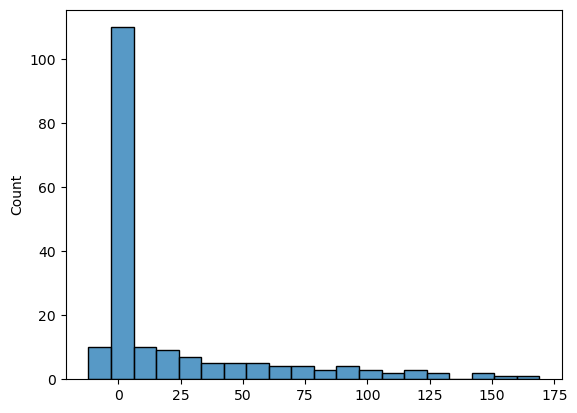

In [85]:
mycard_1 = np.arange(1, 14)
mycard_2 = np.arange(1, 14)

result_2_space = two_list_results(mycard_1, mycard_2)
sns.histplot(result_2_space);